In [169]:
import numpy as np

import pandas as pd

import seaborn as sns

import math

import matplotlib.pyplot as plt

from matplotlib import cm



from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import QuantileTransformer , PowerTransformer

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

from sklearn.metrics import explained_variance_score



import warnings

warnings.filterwarnings('ignore')



%matplotlib inline

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)



import torch

import torch.nn as nn

import torch.optim as optim

import math

from torch.utils.data import DataLoader, TensorDataset


In [ ]:
data_num = 1
model_name = "CNN-LSTM"
df=pd.read_csv(f"data/train_FD00{data_num}.txt",delim_whitespace =True,header=None)



column_names = [

    "unit",

    "time",

    "op setting 1",

    "op setting 2",

    "op setting 3"

] + [f"sensor measurement {i}" for i in range(1, 22)]


lookback = 15

# Assign the column names to the DataFrame

df.columns = column_names

print(df.head())

   unit  time  op setting 1  op setting 2  op setting 3  sensor measurement 1  \
0     1     1       -0.0007       -0.0004         100.0                518.67   
1     1     2        0.0019       -0.0003         100.0                518.67   
2     1     3       -0.0043        0.0003         100.0                518.67   
3     1     4        0.0007        0.0000         100.0                518.67   
4     1     5       -0.0019       -0.0002         100.0                518.67   

   sensor measurement 2  sensor measurement 3  sensor measurement 4  \
0                641.82               1589.70               1400.60   
1                642.15               1591.82               1403.14   
2                642.35               1587.99               1404.20   
3                642.35               1582.79               1401.87   
4                642.37               1582.85               1406.22   

   sensor measurement 5  ...  sensor measurement 12  sensor measurement 13  \
0       

In [171]:
df['RUL'] = df.groupby('unit')['time'].transform(lambda x: x.max() - x)



print(df.head())

   unit  time  op setting 1  op setting 2  op setting 3  sensor measurement 1  \
0     1     1       -0.0007       -0.0004         100.0                518.67   
1     1     2        0.0019       -0.0003         100.0                518.67   
2     1     3       -0.0043        0.0003         100.0                518.67   
3     1     4        0.0007        0.0000         100.0                518.67   
4     1     5       -0.0019       -0.0002         100.0                518.67   

   sensor measurement 2  sensor measurement 3  sensor measurement 4  \
0                641.82               1589.70               1400.60   
1                642.15               1591.82               1403.14   
2                642.35               1587.99               1404.20   
3                642.35               1582.79               1401.87   
4                642.37               1582.85               1406.22   

   sensor measurement 5  ...  sensor measurement 13  sensor measurement 14  \
0       

In [172]:


X = df.iloc[:, :-1]  # Selects all columns except the last one

y = df.iloc[:, -1]   # Selects the last column

df.describe()


,unit,time,op setting 1,op setting 2,op setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [173]:
time = df[["time"]]

temp=df["unit"]

grp = time.groupby(temp)

max_cycles = np.array([max(grp.get_group(i)["time"]) for i in temp.unique()])

In [174]:
# variance_threshold = 0.99

# pca = PCA(n_components=variance_threshold)

# pca.fit(X)



# num_components = pca.n_components_

# print(f"Number of components retained: {num_components}")




Hence PCA is practically useless, it is better to remove columns by inspection

Some columns have extremely small deviation, so they are practically useless

In [175]:

filtered_out_columns = df.loc[:, df.std() < 0.005].columns.tolist()

df = df.loc[:, df.std() >= 0.005]

df.describe()








,unit,time,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 7,sensor measurement 8,sensor measurement 9,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251,68.880990
min,1.000000,1.000000,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200,0.000000
25%,26.000000,52.000000,642.325000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800,51.000000
50%,52.000000,104.000000,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900,103.000000
75%,77.000000,156.000000,643.000000,1594.380000,1414.555000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800,155.000000
max,100.000000,362.000000,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400,361.000000


Now we normalise values between 0-1 and use power transformer which makes the data more Gaussian like, reduces skewness and stabilizes variance

In [176]:
scale = MinMaxScaler(feature_range=(0, 1))

df = scale.fit_transform(df)

df = pd.DataFrame(df)



Gauss = PowerTransformer(method='yeo-johnson')

df = Gauss.fit_transform(df)

df=np.nan_to_num(df)

df = pd.DataFrame(df)

# print(df.head())



X = df.iloc[:, :-1]



print(y)

print(X)

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64
             0         1         2         3         4         5         6   \
0     -1.737938 -1.846881 -1.871061 -0.081738 -0.932431  1.165602 -0.463375   
1     -1.737938 -1.824224 -1.079195  0.263809 -0.601489  0.381987 -0.783002   
2     -1.737938 -1.801670 -0.632442 -0.370142 -0.468676  1.032163 -0.159131   
3     -1.737938 -1.779219 -0.632442 -1.306119 -0.764661  1.287388  0.270731   
4     -1.737938 -1.756870 -0.589021 -1.294771 -0.223683  0.694398 -0.463375   
...         ...       ...       ...       ...       ...       ...       ...   
20626  1.650625  1.233718  1.543554  1.200045  1.940086 -1.970282  1.282952   
20627  1.650625  1.244788  1.627183  2.096288  2.314491 -2.407067  1.727085   
20628  1.650625  1.255824  1.425039  1.825290  1.904545 -2.348902  1.832507   
20629  1.650625  1.266828  1

In [177]:

count = 0

for cycle_len in max_cycles:

    for i in range(21):

        y[count+i] = 0

    count = count + cycle_len

print(count)

print(max_cycles)


20631
[192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 135 341 155 258 283 336 202 156 185 200]


In [178]:
def create_dataset(X, look_back=20):

    data = []

    for i in range(len(X)-look_back-1):

        data.append(X[i:(i+look_back)])

    return np.array(data)





X_train = create_dataset(X,lookback)

y_train = np.array(y[lookback+1:len(X_train) + lookback+1])

print("Shape of X_train:", X_train.shape)

print("Shape of y_train:", y_train.shape)




Shape of X_train: (20615, 15, 16)
Shape of y_train: (20615,)


In [179]:
if torch.cuda.is_available():

    print(f"CUDA is available. Using GPU: {torch.cuda.get_device_name(0)}")

else:

    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU: Tesla P100-PCIE-16GB


In [180]:
class SimpleGRUModelSmall(nn.Module):
    def __init__(self, input_size):
        super(SimpleGRUModelSmall, self).__init__()

        self.gru = nn.GRU(input_size, 64, batch_first=True, dropout=0.2)

        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

        self._initialize_weights()

    def forward(self, x):
        
        x, _ = self.gru(x)

        x = x[:, -1, :]

        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

    def _initialize_weights(self):
        for name, param in self.named_parameters():
            if 'fc' in name and 'weight' in name:
                nn.init.kaiming_uniform_(param, nonlinearity='relu')
            elif 'bias' in name:
                nn.init.zeros_(param)

class RNNModel(nn.Module):
    def __init__(self, input_size):
        super(RNNModel, self).__init__()

        # First RNN layer with 128 hidden units
        self.rnn1 = nn.RNN(input_size, 128, batch_first=True, nonlinearity='relu')
        self.batch_norm1 = nn.BatchNorm1d(128)

        # Second RNN layer with 64 hidden units
        self.rnn2 = nn.RNN(128, 64, batch_first=True, nonlinearity='relu')
        self.batch_norm2 = nn.BatchNorm1d(64)

        # Fully connected layers
        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, 1)

        # Activation function and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

        # Initialize weights
        self._initialize_weights()

    def forward(self, x):
        # First RNN layer
        x, _ = self.rnn1(x)
        x = x.permute(0, 2, 1)
        x = self.batch_norm1(x)  # BatchNorm
        x = x.permute(0, 2, 1)

        # Second RNN layer
        x, _ = self.rnn2(x)
        x = x.permute(0, 2, 1)
        x = self.batch_norm2(x)  # BatchNorm
        x = x.permute(0, 2, 1)

        # Get the output of the last time step
        x = x[:, -1, :]

        # Fully connected layers with dropout
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

    def _initialize_weights(self):
        for name, param in self.named_parameters():
            if 'fc' in name and 'weight' in name:
                nn.init.kaiming_uniform_(param, nonlinearity='relu')
            elif 'bias' in name:
                nn.init.zeros_(param)



class LSTMModel(nn.Module):
    def __init__(self, input_size):
        super(LSTMModel, self).__init__()

        self.lstm1 = nn.LSTM(input_size, 128, batch_first=True)
        self.batch_norm1 = nn.BatchNorm1d(128)

        self.lstm2 = nn.LSTM(128, 64, batch_first=True)
        self.batch_norm2 = nn.BatchNorm1d(64)

        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

        self._initialize_weights()

    def forward(self, x):
        x, _ = self.lstm1(x)

        x = x.permute(0, 2, 1)
        x = self.batch_norm1(x)
        x = x.permute(0, 2, 1)

        x, _ = self.lstm2(x)

        x = x.permute(0, 2, 1)
        x = self.batch_norm2(x)
        x = x.permute(0, 2, 1)

        x = x[:, -1, :]

        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

    def _initialize_weights(self):
        for name, param in self.named_parameters():
            if 'fc' in name and 'weight' in name:
                nn.init.kaiming_uniform_(param, nonlinearity='relu')
            elif 'bias' in name:
                nn.init.zeros_(param)

class CNNLSTMModel(nn.Module):
    def __init__(self, input_size, sequence_length):
        super(CNNLSTMModel_2, self).__init__()
        
        self.conv1d_1 = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, padding=1)
        
        self.conv1d_2 = nn.Conv1d(in_channels=32, out_channels=128, kernel_size=3, padding=1)
        
        self.lstm1 = nn.LSTM(input_size=128, hidden_size=128, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, batch_first=True)

        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, 1)
     
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.conv1d_1(x)
        x = self.relu(x)
        
        x = self.conv1d_2(x)
        x = self.relu(x)
        
        x = x.transpose(1, 2)
        
        x, _ = self.lstm1(x)
        
        x, _ = self.lstm2(x)
        
        x = x[:, -1, :]
        
        x = self.relu(self.fc1(x))
        x = self.fc2(x)          
        
        return x
        
class CNNLSTMModel_drop(nn.Module):
    def __init__(self, input_size, sequence_length, dropout_prob=0.5):
        super(CNNLSTMModel_drop, self).__init__()
        
        self.conv1d_1 = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=4, padding=1)
        self.conv_dropout1 = nn.Dropout(p=dropout_prob)
        
        self.conv1d_2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv_dropout2 = nn.Dropout(p=dropout_prob)
        
        self.lstm1 = nn.LSTM(input_size=64, hidden_size=128, batch_first=True)
        self.lstm_dropout1 = nn.Dropout(p=dropout_prob)
        
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, batch_first=True)
        self.lstm_dropout2 = nn.Dropout(p=dropout_prob)

        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # First CNN layer
        x = x.transpose(1, 2)
        x = self.conv1d_1(x)
        x = self.relu(x)
        x = self.conv_dropout1(x)
        
        x = self.conv1d_2(x)
        x = self.relu(x)
        x = self.conv_dropout2(x)
        
        x = x.transpose(1, 2)
        
        x, _ = self.lstm1(x)
        x = self.lstm_dropout1(x)
        
        x, _ = self.lstm2(x)
        x = self.lstm_dropout2(x)
        
        x = x[:, -1, :]
        
        x = self.relu(self.fc1(x)) 
        x = self.fc2(x)            
        
        return x
        
class CNNLSTM_batch(nn.Module):
    def __init__(self, input_size, sequence_length):
        super(CNNLSTM_batch, self).__init__()
        
        self.conv1d_1 = nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        
        self.conv1d_2 = nn.Conv1d(in_channels=32, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        
        self.lstm1 = nn.LSTM(input_size=128, hidden_size=128, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=64, batch_first=True)
        
        self.fc1 = nn.Linear(64, 16)
        self.bn_fc1 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.conv1d_1(x)  
        x = self.bn1(x)  
        x = self.relu(x)
        
        x = self.conv1d_2(x)
        x = self.bn2(x) 
        x = self.relu(x)
        

        x = x.transpose(1, 2) 
        
        x, _ = self.lstm1(x)
        
        x, _ = self.lstm2(x)
        
        x = x[:, -1, :]
        
        x = self.relu(self.bn_fc1(self.fc1(x))) 
        x = self.fc2(x)                      
        
        return x

In [181]:



input_dim = X_train.shape[2]
# ,sequence_length=lookback
model = CNNLSTMModel_drop(input_size=input_dim,sequence_length=lookback).to("cuda")

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)



X_train_tensor = torch.tensor(X_train, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)



X_train_tensor = X_train_tensor.to("cuda")

y_train_tensor = y_train_tensor.to("cuda")



batch_size = 512

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)






Epoch 1/30, Loss: 11993.571050876524, Val Loss: 11528.435546875
Epoch 2/30, Loss: 11006.031130907013, Val Loss: 10332.6025390625
Epoch 3/30, Loss: 9573.282869664634, Val Loss: 8783.265625
Epoch 4/30, Loss: 8019.514041063262, Val Loss: 7209.02099609375
Epoch 5/30, Loss: 6563.145757907774, Val Loss: 5923.1142578125
Epoch 6/30, Loss: 5510.767691263339, Val Loss: 5107.39013671875
Epoch 7/30, Loss: 4949.726514862805, Val Loss: 4716.693359375
Epoch 8/30, Loss: 4726.03193478468, Val Loss: 4579.140625
Epoch 9/30, Loss: 4661.37539300686, Val Loss: 4543.767578125
Epoch 10/30, Loss: 4657.169647961128, Val Loss: 4534.44140625
Epoch 11/30, Loss: 4654.648080221036, Val Loss: 4532.2294921875
Epoch 12/30, Loss: 4636.686678258384, Val Loss: 4532.15625
Epoch 13/30, Loss: 4641.547273961509, Val Loss: 4532.03076171875
Epoch 14/30, Loss: 4637.665485661204, Val Loss: 4531.65283203125
Epoch 15/30, Loss: 4634.284400009527, Val Loss: 4531.76171875
Epoch 16/30, Loss: 4633.521353372714, Val Loss: 4531.7060546875

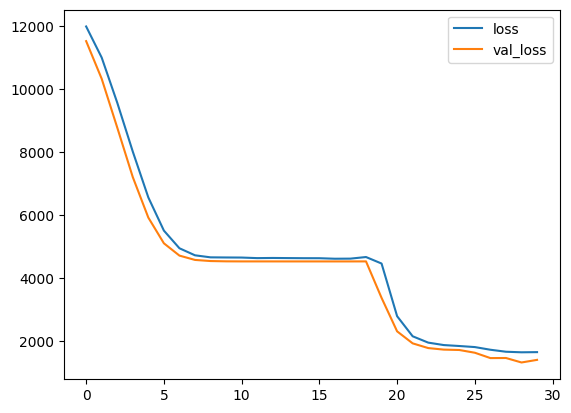

In [182]:
train_losses = []

val_losses = []




epochs = 30

for epoch in range(epochs):

    model.train()

    running_loss = 0.0



    for X_batch, y_batch in train_loader:

        optimizer.zero_grad()

        y_pred = model(X_batch)

        loss = criterion(y_pred.squeeze(), y_batch)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()




    avg_train_loss = running_loss / len(train_loader)

    train_losses.append(avg_train_loss)



    model.eval()

    with torch.no_grad():

        y_val_pred = model(X_train_tensor)

        val_loss = criterion(y_val_pred.squeeze(), y_train_tensor).item()

        val_losses.append(val_loss)



    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss}, Val Loss: {val_loss}")




plt.plot(range(epochs), train_losses, label="loss")

plt.plot(range(epochs), val_losses, label="val_loss")

plt.legend()

plt.show()

In [183]:


torch.save(model.state_dict(), 'model_parameters_batch1.pth')


In [184]:


loaded_model =  CNNLSTMModel_drop(input_size=input_dim,sequence_length=lookback)

loaded_model.load_state_dict(torch.load('model_parameters_batch1.pth'))

loaded_model.eval()


CNNLSTMModel_drop(
  (conv1d_1): Conv1d(16, 32, kernel_size=(4,), stride=(1,), padding=(1,))
  (conv_dropout1): Dropout(p=0.5, inplace=False)
  (conv1d_2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv_dropout2): Dropout(p=0.5, inplace=False)
  (lstm1): LSTM(64, 128, batch_first=True)
  (lstm_dropout1): Dropout(p=0.5, inplace=False)
  (lstm2): LSTM(128, 64, batch_first=True)
  (lstm_dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=64, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
df_test = pd.read_csv(f"data/test_FD00{data_num}.txt", delim_whitespace = True,header=None)

df_rul = pd.read_csv(f"data/RUL_FD00{data_num}.txt", delim_whitespace = True,header=None)

# df_test["RUL"] = df_rul[0]

column_names = [

    "unit",

    "time",

    "op setting 1",

    "op setting 2",

    "op setting 3"

] + [f"sensor measurement {i}" for i in range(1, 22)]



df_test.columns = column_names

In [186]:
RUL_name = ["time"]

RUL_data = df_test[RUL_name]

MachineID_series = df_test["unit"]

grp = RUL_data.groupby(MachineID_series)

max_cycles = np.array([max(grp.get_group(i)["time"]) for i in MachineID_series.unique()])

max_cycles[0] = max_cycles[0] - 21

In [187]:


# df_test.drop(columns=["sensor measurement 10","sensor measurement 19","sensor measurement 18","op setting 1","op setting 2","op setting 3" ,"sensor measurement 5","sensor measurement 1","sensor measurement 16","sensor measurement 6"],inplace=True)
df_test.drop(columns=filtered_out_columns , inplace=True)

scale = MinMaxScaler(feature_range=(0, 1))

df_test = scale.fit_transform(df_test)

df_test = pd.DataFrame(df_test)



Gauss = PowerTransformer(method='yeo-johnson')

df_test = Gauss.fit_transform(df_test)

df_test=np.nan_to_num(df_test)

df_test = pd.DataFrame(df_test)



In [188]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.843485,-1.793850,1.333227,-0.543820,-0.981745,0.157202,-0.501657,-0.734950,-1.135844,-0.112400,-0.698911,-1.521652,-0.692054,-0.435852,-0.266363,0.420595
1,-1.843485,-1.759832,-2.026229,0.095924,-1.467193,1.720949,-1.077473,-0.259251,0.487480,0.721475,-0.143646,0.182103,-1.649791,0.378493,0.899581,0.647087
2,-1.843485,-1.726093,-0.000094,-0.207106,-0.467327,0.483115,-0.317637,0.000826,0.487480,0.351776,-0.698911,-0.907151,0.657711,0.378493,1.361062,0.966019
3,-1.843485,-1.692628,-0.050265,-0.786268,0.307571,0.420181,-0.689532,-1.352331,-0.667106,-0.703805,-0.325176,-0.561267,-1.201106,-1.300958,0.748684,0.423078
4,-1.843485,-1.659435,0.124510,-0.156604,-0.375254,0.562352,-1.077473,-1.453359,-0.498585,0.701649,-0.698911,-0.979154,-0.769737,-2.225587,0.673786,0.919656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,1.670155,1.816143,1.822924,2.173170,1.574625,-0.560445,-0.881417,3.751022,1.353767,-1.767171,-1.288265,4.158266,1.520245,1.148940,-1.652391,-1.589975
13092,1.670155,1.826113,1.779129,1.487011,2.325282,-0.822779,-0.317637,3.721800,0.956764,-1.234850,0.381065,4.091635,0.887575,1.880977,-2.136804,-0.723323
13093,1.670155,1.836033,2.253302,1.010007,0.365717,-1.063189,0.713093,3.823968,0.819230,-1.030634,-0.510221,4.261843,1.068803,1.880977,-1.836884,-1.509363
13094,1.670155,1.845903,1.866578,1.356678,2.011041,-0.616408,0.039405,3.855726,1.002015,-0.786960,0.209360,4.342250,1.508112,1.880977,-1.590139,-0.804552


In [189]:
X_test = np.array(df_test)



y_test = np.array(df_rul)


print(X_test.shape,y_test.shape)

print(max_cycles)

(13096, 16) (100, 1)
[ 10  49 126 106  98 105 160 166  55 192  83 217 195  46  76 113 165 133
 135 184 148  39 130 186  48  76 140 158 171 143 196 145  50 203 198 126
 121 125  37 133 123 156 172  54 152 146  73  78 303  74 144 189 164 121
 113 136 160 176  94 147 159 232 155 168  71 147  71 187  54 152  68 131
 112 137  88 205 162  72 101 133 213 162  73 172  34 110  56  68 177 146
 234 150 244 133  89  97 134 121  97 198]


In [190]:
def create_dataset(X, look_back=20):

    data = []

    for i in range(len(X)-look_back-1):

        data.append(X[i:(i+look_back)])

    return np.array(data)

In [191]:
X_test = create_dataset(X_test)

In [192]:
print(X_test.shape,y_test.shape)

(13075, 20, 16) (100, 1)


In [193]:
X_test = torch.tensor(X_test, dtype=torch.float32)

X_test = X_test.to("cuda")


In [194]:
pred = model(X_test)

In [195]:
pred.shape

torch.Size([13075, 1])

[143, 92, 38, 63, 61, 66, 79, 52, 93, 62, 44, 77, 66, 59, 79, 81, 39, 60, 63, 25, 55, 124, 86, 27, 105, 78, 60, 64, 66, 58, 23, 41, 83, 12, 20, 21, 40, 40, 158, 27, 37, 18, 62, 128, 65, 40, 60, 102, 22, 75, 61, 36, 35, 116, 128, 7, 72, 48, 116, 86, 38, 46, 53, 35, 101, 25, 100, 21, 137, 86, 74, 62, 153, 88, 70, 27, 41, 129, 83, 63, 18, 19, 84, 60, 158, 61, 115, 67, 84, 36, 17, 15, 38, 48, 62, 85, 64, 76, 99, 26]


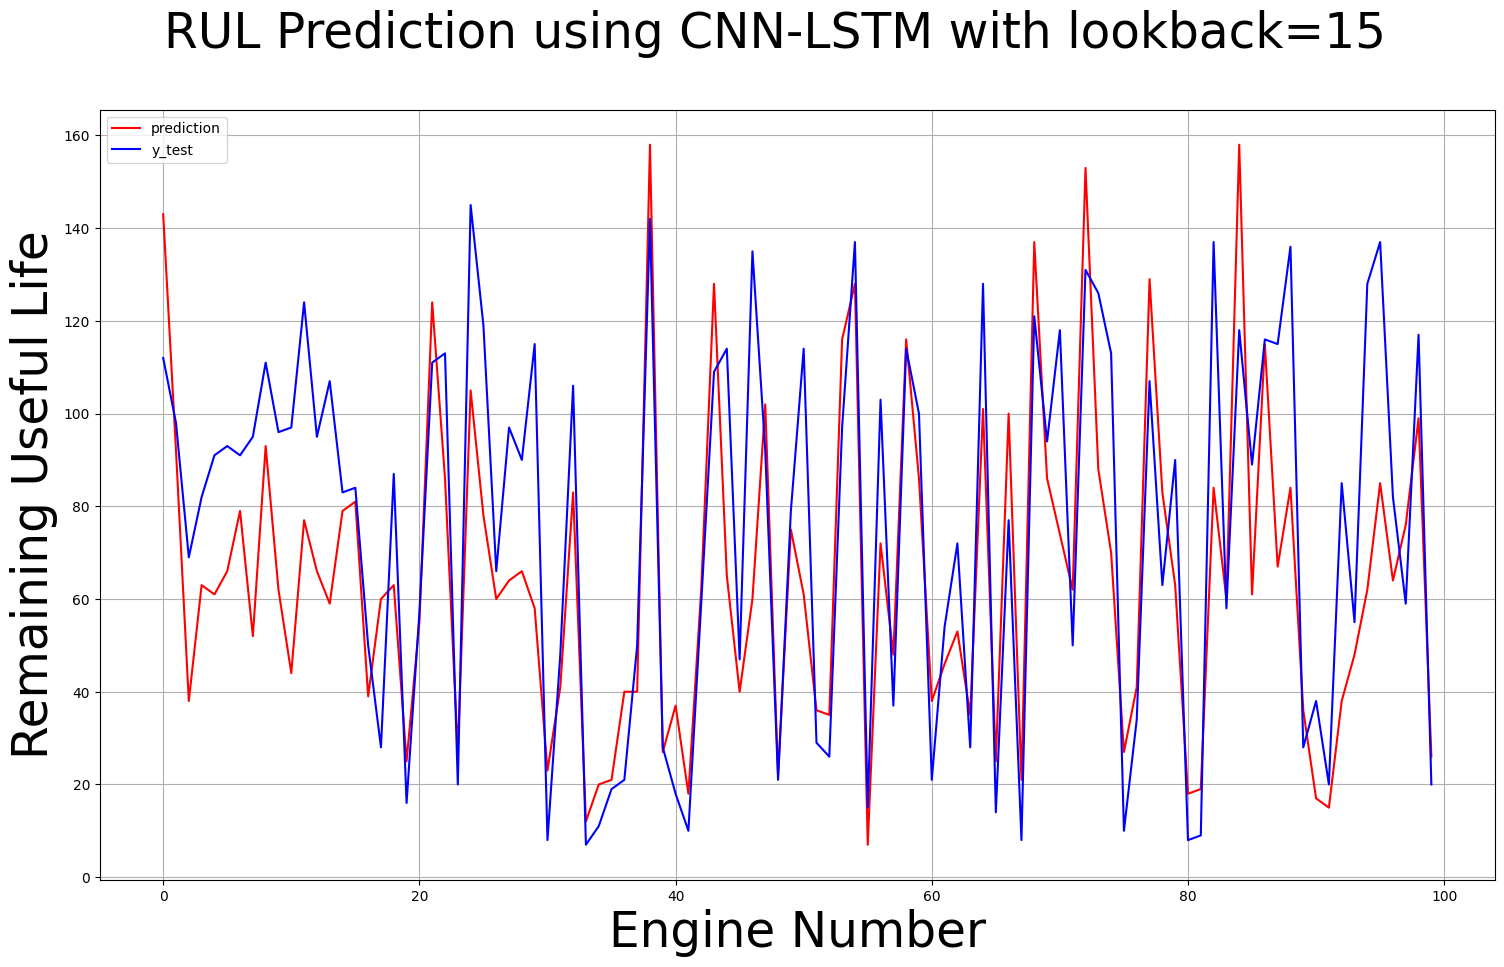

mean_squared_error >>  736.04
root_mean_squared_error >>  27.13005713226568
mean_absolute_error >> 21.36


In [196]:
final_pred = []

count = 0

for i in range(y_test.shape[0]):

    j = max_cycles[i]

    temp = pred[count+j-1]

    count=count+j

    final_pred.append(int(temp))



print(final_pred)





fig = plt.figure(figsize=(18,10))

plt.plot(final_pred,color='red', label='prediction')

plt.plot(y_test,color='blue', label='y_test')



fig.suptitle(f'RUL Prediction using {model_name} with lookback={lookback}', fontsize=35)

plt.xlabel("Engine Number", fontsize=35)

plt.ylabel("Remaining Useful Life", fontsize=35)



plt.legend(loc='upper left')

plt.grid()

plt.show()



print("mean_squared_error >> ", mean_squared_error(y_test,final_pred))

print("root_mean_squared_error >> ", math.sqrt(mean_squared_error(y_test,final_pred)))

print("mean_absolute_error >>",mean_absolute_error(y_test,final_pred))
